### 접근
- 원래 전투력이 $1 \leq x_i \leq 100$ 이고 $-5 \leq a_i \leq -1$ 이므로 그래프의 개형은 위로 볼록한 2차함수의 모양이 될 것이다.
  - 예제 입력의 그래프를 보면 이러한 모양이다.
    - 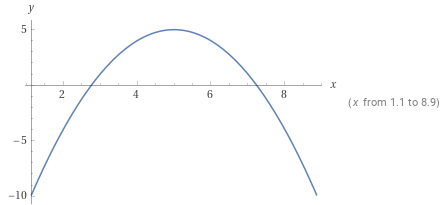
  - 그래프의 꼭짓점에 최대한 가깝도록 $x$ 의 부분합이 될 수 있는 조합들을 찾아서 대입한다? 나이브한 전략은 이러한 것 같다.
- convex hull trick을 사용하는 문제인 걸로 보이지만 문제에서 일차함수를 찾을 수 없다. 어떻게 해야할까?

### 풀이
- 최댓값을 찾는 문제는 $b[j]$ 가 단조증가할 때 사용할 수 있다. 
  - 이때, 병사들의 전투력을 더하는 것은 단조 증가를 의미하므로 $x_i \in X$ 의 누적합을 구하는 것은 단조 증가를 의미한다.
    - 여기서 왜 연속합이 자꾸 나올지 생각해봤는데(연속하지 않은 구간에서의 부분합들로만 이루어진 정답이 있을 수 있으니까), \
    문제에서 연속하는 병사들을 나누어야 한다는 내용이 적혀있었다. 상당히 중요한 내용인데 캐치하지 못했었다.
    - 누적합을 구하면서 모든 병사를 연속적인 구간으로 나누는 문제인 것을 알았다. 점점 Convex hull trick을 사용할 수 있는 형태에 가까워진다.
  - 1부터 i까지의 누적합 $acc[i] = acc[i] + b[i]$ 이라고 정의한다.
  - 위 사실을 이용하여 DP 점화식을 세울 수 있다. 
    - $i \leq i < n$ 일 때, DP[n] = `max((i 까지의 최적해) + (i+1 ~ n 까지 변형된 전투력을 적용한 값))`  가 된다.\
    $DP[n] = \max(DP[i] + \text {(i+1 ~ n 까지 변형된 전투력을 적용한 값)})$
    - 구간 $(i, n]$ 의 누적합은 $acc[n] - acc[i]$ 이므로\
    $DP[n] = \max(DP[i] + a(acc[n] - acc[i])^2 + b(acc[n] - acc[i]) + c)$\
    전개하면 \
    $DP[n] = \max(DP[i] + a \cdot acc[n]^2 - 2a \cdot acc[n] \cdot acc[i] + a \cdot acc[i]^2 + b \cdot acc[n] - b \cdot acc[i] + c)$\
    정의에 의해 $\max$ 는 $i$ 의 변화에 증가하므로($n$ 에 대한 함수이므로), $i$ 와 상관없는 항들을 $\max$ 바깥으로 빼낼 수 있다.\
    $DP[n] = \max(-2a \cdot acc[i] \cdot acc[n] + a \cdot acc[i]^2 - b \cdot acc[i] + DP[i]) + a \cdot acc[n]^2 + b \cdot acc[n] + c$\
    이제 $acc[n] = x$ 로 치환하면 \
    $DP[n] = \max(-2a \cdot acc[i] \cdot x + a \cdot acc[i]^2 - b \cdot acc[i] + DP[i]) + a \cdot x^2 + b \cdot x + c$\
    그리고 $\max$ 내부에서 $x$ 
  - 기울기가 $-2a \cdot acc[i]$ 이고 $y$ 절편이 $a \cdot acc[i]^2 - b \cdot acc[i] + DP[i]$ 인 직선들을 추가하면 된다.

In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

from bisect import bisect_left
class CHT :
  def __init__(self, A=[], B=[], EPS=1e-7) :
    self.A = A
    self.B = B
    self.I = []
    self.X = []
    self.i = 0
    self.EPS = EPS
  
  def intersect(self, i, j) :
    return (self.B[j] - self.B[i]) / (self.A[i] - self.A[j])

  def add(self, a, b, i=None) : #Amortized O(1)
    self.A.append(a)
    self.B.append(b)
    I, X = self.I, self.X
    if i is None :
      i = self.i
      self.i += 1

    while True:
      if not I:
        I.append(i)
        break
      elif abs(self.A[I[-1]] - self.A[i]) <= self.EPS :
        if self.B[I[-1]] > self.B[i] :
          break
        I.pop()
        if X: X.pop()
      else:
        x = self.intersect(i, I[-1])
        if X and x <= X[-1] :
          I.pop()
          X.pop()
        else:
          I.append(i)
          X.append(x)
          break

  def query(self, x) : #O(logN)
    i = self.I[bisect_left(self.X, x + self.EPS)]
    return self.A[i] * x + self.B[i]

def sol() :
  N = int(input())
  a, b, c = map(int, input().split())
  L = list(map(int, input().split()))
  acc = [0] * (N + 1)
  for i, v in enumerate(L) :
    acc[i + 1] = acc[i] + v

  DP = [0] * (N + 1)
  cht = CHT()
  cht.add(0, 0)
  for n in range(1, N+1) :
    DP[n] = a * acc[n] ** 2 + b * acc[n] + c + cht.query(acc[n])
    cht.add(-2 * a * acc[n], DP[n] - b * acc[n] + a * acc[n] ** 2)
  print(DP[N])

sol()

- 이때 $n$ 이 증가함에 따라 함수값도 증가하므로 이분탐색을 하지 않는 $\Omicron(N)$ 으로도 풀 수 있다.